# Udacity Data Wrangling Project: WeRateDogs Twitter Data
 


# Loading Libraries

In [1]:
#Importing the packages we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json
import datetime
import time 

# Importing twitter data archive 

In [2]:
#Reading CSV file #twitter_archive
tw_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
tw_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
tw_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

# downloading image predictions

In [5]:
#URL downloaded programatically 
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

#Reading 'tsv' file
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [6]:
image_predictions.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [7]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


# Twitter API


In [8]:
#udacity code
import tweepy

consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [9]:
df_list = []

with open('tweet-json.txt') as file:
    for line in file:
        df_list.append(json.loads(line))

In [10]:
print(df_list[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [11]:
#creating a df from the previous list that contains the id, retweet count, and favourite count
tw_data = pd.DataFrame(df_list, columns = ['id', 
                                             'retweet_count', 
                                             'favorite_count'])

In [12]:
tw_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [13]:
#changing the name of the 'id' column to 'tweet_id'
tw_data = tw_data.rename(columns = {'id': 'tweet_id'})
tw_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [14]:
tw_data.info

<bound method DataFrame.info of                 tweet_id  retweet_count  favorite_count
0     892420643555336193           8853           39467
1     892177421306343426           6514           33819
2     891815181378084864           4328           25461
3     891689557279858688           8964           42908
4     891327558926688256           9774           41048
...                  ...            ...             ...
2349  666049248165822465             41             111
2350  666044226329800704            147             311
2351  666033412701032449             47             128
2352  666029285002620928             48             132
2353  666020888022790149            532            2535

[2354 rows x 3 columns]>

In [15]:
#getting the lenght of the list
print("The list of tweets" ,len(tw_data))

The list of tweets 2354


In [16]:
#SAVING DATAFRAME TO CSV FILE 
tw_data.to_csv('tweet_data.csv', index=False)

# Data Assessment


In [17]:
# Reading gathered files
tw_archive = pd.read_csv('twitter-archive-enhanced.csv')
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
tweet_status = pd.read_json('tweet-json.txt', lines = True,encoding='utf-8')

In [18]:
tw_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [19]:
tw_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [20]:
tw_archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [21]:
tw_archive[tw_archive['rating_numerator'] == 1 ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Not familiar with this breed. N...,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
1446,696490539101908992,6.964887e+17,4.196984e+09,2016-02-08 00:27:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After reading the comments I may have overesti...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
1869,675153376133427200,NaN,NaN,2015-12-11 03:21:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What kind of person sends in a picture without...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675153376...,1,10,None,None,None,None,None
1940,673716320723169284,6.737159e+17,4.196984e+09,2015-12-07 04:11:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The millennials have spoken and we've decided ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2091,670783437142401025,NaN,NaN,2015-11-29 01:56:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Flamboyant pup here. Probably poisonous. Won't...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670783437...,1,10,None,None,None,None,None
2261,667549055577362432,NaN,NaN,2015-11-20 03:44:31 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Never seen dog like this. Breathes heavy. Tilt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667549055...,1,10,None,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None
2338,666104133288665088,NaN,NaN,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Not familiar with this breed. No tail (weird)....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None


In [22]:
tw_archive['text'][tw_archive['rating_numerator'] == 1 ]

605     RT @dog_rates: Not familiar with this breed. N...
1446    After reading the comments I may have overesti...
1869    What kind of person sends in a picture without...
1940    The millennials have spoken and we've decided ...
2038    After 22 minutes of careful deliberation this ...
2091    Flamboyant pup here. Probably poisonous. Won't...
2261    Never seen dog like this. Breathes heavy. Tilt...
2335    This is an Albanian 3 1/2 legged  Episcopalian...
2338    Not familiar with this breed. No tail (weird)....
Name: text, dtype: object

In [23]:
tw_archive[tw_archive['rating_numerator'] < 10 ].count()

tweet_id                      440
in_reply_to_status_id          12
in_reply_to_user_id            12
timestamp                     440
source                        440
text                          440
retweeted_status_id             9
retweeted_status_user_id        9
retweeted_status_timestamp      9
expanded_urls                 430
rating_numerator              440
rating_denominator            440
name                          440
doggo                         440
floofer                       440
pupper                        440
puppo                         440
dtype: int64

In [24]:
tw_archive[tw_archive['rating_numerator'] < 10 ].tweet_id

45      883482846933004288
229     848212111729840128
315     835152434251116546
387     826598799820865537
462     817502432452313088
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 440, dtype: int64

In [25]:
tw_archive.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [26]:
tw_archive.name.value_counts() 

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
          ... 
Leonard      1
Jazz         1
Crouton      1
Mona         1
JD           1
Name: name, Length: 957, dtype: int64

In [27]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [28]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [30]:
image_predictions.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
marmot                  1
tricycle                1
hare                    1
minibus                 1
hammer                  1
Name: p1, Length: 378, dtype: int64

In [31]:
image_predictions.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
balance_beam           1
sea_cucumber           1
hatchet                1
passenger_car          1
maze                   1
Name: p3, Length: 408, dtype: int64

In [32]:
rare_dogs= image_predictions.groupby('p1').filter(lambda x: len(x) < 3)

In [33]:
print(len(rare_dogs)) 
print(len(image_predictions))

271
2075


In [34]:
tweet_status

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [35]:
tweet_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [36]:
tweet_status.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [37]:
tweet_status.retweet_count.value_counts() 

1972     5
3652     5
83       5
146      4
61       4
        ..
8209     1
19       1
2068     1
30742    1
0        1
Name: retweet_count, Length: 1724, dtype: int64

# Assessment report


  #   Tidiness Issues 
          1.Not all columns are needed for further analysis in tw_arachive
          2.Create one column for the various dog types: doggo, floofer, pupper, puppo

# Quality issues
    1.Delete retweets by filtering the NaN of retweeted_status_user_id
    2.Remove columns no longer needed 
    3.Merge the clean versions of TABLES: tw_archive, image_predictions, and tweet_status dataframes
    4.Correcting the dog types
    5.Change tweet_id from an integer to a string
    6.Timestamps to datetime format
    6.Fix numerator and denominators
    7.Correcting naming issues
    8.Making std dog rate



# Cleaning Data

     Reading gathered files


In [38]:
tw_archive = pd.read_csv('twitter-archive-enhanced.csv')
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
tweet_status = pd.read_json('tweet-json.txt', lines = True,encoding='utf-8')

     Make a copy of the tables before cleaning


In [39]:
twitter_archive_clean = tw_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_status_clean = tweet_status.copy()

# code


In [40]:
# Delete retweets by filtering the NaN of retweeted_status_user_id
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean['retweeted_status_user_id'])]

#TEST
print(sum(twitter_archive_clean.retweeted_status_user_id.value_counts()))

0


In [41]:
#Twitter archive - Delete columns that won't be used for analysis


#get the column names of twitter_archive_clean
print(list(twitter_archive_clean))

#CODE: Delete columns no needed
twitter_archive_clean = twitter_archive_clean.drop(['source',
                                                    'in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp', 
                                                    'expanded_urls'], 1)


['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


# test

In [42]:
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

# code

In [43]:
#Merge the clean versions of twitter_archive, image_predictions, and tweet_status dataframes Correct the dog types

dfs = pd.concat([twitter_archive_clean, image_predictions_clean, tweet_status_clean], join='outer', axis=1)

# test

In [44]:
dfs.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,8.924206e+17,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,None,None,None,...,39467.0,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,8.921774e+17,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,None,None,None,...,33819.0,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,8.918152e+17,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,None,None,None,...,25461.0,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,8.916896e+17,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None,None,None,None,...,42908.0,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,8.913276e+17,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,None,None,None,...,41048.0,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [45]:
dfs.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'created_at', 'id',
       'id_str', 'full_text', 'truncated', 'display_text_range', 'entities',
       'extended_entities', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'lang',
       'retweeted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status'],
      dtype='object')

In [46]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2175 non-null   float64            
 1   timestamp                      2175 non-null   object             
 2   text                           2175 non-null   object             
 3   rating_numerator               2175 non-null   float64            
 4   rating_denominator             2175 non-null   float64            
 5   name                           2175 non-null   object             
 6   doggo                          2175 non-null   object             
 7   floofer                        2175 non-null   object             
 8   pupper                         2175 non-null   object             
 9   puppo                          2175 non-null   object             
 10  tweet_id                

# code

In [47]:
dfs['dog_type'] = dfs['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [48]:
dfs[['dog_type', 'doggo', 'floofer', 'pupper', 'puppo']].sample(5)

,dog_type,doggo,floofer,pupper,puppo
2297,NaN,None,None,None,None
352,pupper,None,None,pupper,None
1789,NaN,None,None,None,None
1754,NaN,None,None,None,None
214,NaN,None,None,None,None


# test

In [49]:
dfs.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,dog_type
0,8.924206e+17,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,None,None,None,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,8.921774e+17,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,None,None,None,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,8.918152e+17,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,None,None,None,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,8.916896e+17,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None,None,None,None,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,8.913276e+17,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,None,None,None,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [50]:
dfs.dog_type.value_counts()

pupper     244
doggo       84
puppo       32
floofer      4
Name: dog_type, dtype: int64

In [51]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2175 non-null   float64            
 1   timestamp                      2175 non-null   object             
 2   text                           2175 non-null   object             
 3   rating_numerator               2175 non-null   float64            
 4   rating_denominator             2175 non-null   float64            
 5   name                           2175 non-null   object             
 6   doggo                          2175 non-null   object             
 7   floofer                        2175 non-null   object             
 8   pupper                         2175 non-null   object             
 9   puppo                          2175 non-null   object             
 10  tweet_id                

# code

In [52]:
# Change tweet_id from an integer to a string

dfs['tweet_id'] = dfs['tweet_id'].astype(str)
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2356 non-null   object             
 1   timestamp                      2175 non-null   object             
 2   text                           2175 non-null   object             
 3   rating_numerator               2175 non-null   float64            
 4   rating_denominator             2175 non-null   float64            
 5   name                           2175 non-null   object             
 6   doggo                          2175 non-null   object             
 7   floofer                        2175 non-null   object             
 8   pupper                         2175 non-null   object             
 9   puppo                          2175 non-null   object             
 10  tweet_id                

# code

In [53]:
#Remove the time zone from the 'timestamp' column
dfs['timestamp'] = dfs['timestamp'].str.slice(start=0, stop=-6)

In [54]:
# Changing the 'timestamp' column to a datetime object..
dfs['timestamp'] = pd.to_datetime(dfs['timestamp'], format = "%Y-%m-%d %H:%M:%S")

# test

In [55]:
dfs.sample(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,dog_type
894,7.591973883178476e+17,2016-07-30 01:22:17,This is Luna. She's just heckin precious af I ...,12.0,10.0,Luna,None,None,None,None,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1071,7.402140385845576e+17,2016-06-07 16:09:13,This is getting incredibly frustrating. This i...,10.0,10.0,getting,None,None,None,None,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1297,7.077769350075392e+17,2016-03-10 03:55:45,This is Sadie. She's a Bohemian Rhapsody. Rema...,11.0,10.0,Sadie,None,None,None,None,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
612,nan,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1410,6.99036661657768e+17,2016-02-15 01:05:02,HAPPY V-DAY FROM YOUR FAV PUPPER SQUAD 13/10 f...,13.0,10.0,None,None,None,pupper,None,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


# code

In [56]:
#naming issues
dfs.name = dfs.name.str.replace('^[a-z]+', 'None')

# test

In [57]:
dfs['name'].value_counts()

None        784
Charlie      11
Lucy         11
Oliver       10
Cooper       10
           ... 
Bayley        1
Randall       1
Florence      1
Jessiga       1
JD            1
Name: name, Length: 931, dtype: int64

In [58]:
dfs['name'].sample(50)

990         None
889       Maggie
1759       Tango
2240      Jiminy
421      Jimison
257        Sadie
1147      Sprout
173       Sophie
2194     Ruffles
953       Tucker
1689        None
1748    Chompsky
1202    Bluebert
1324        None
826          NaN
784          NaN
1563      Lizzie
902         None
1881       Laela
2290     Kenneth
961       Cooper
564      Severus
1033     Jeffrey
2151       Louie
688        Frank
786       Finley
1487        Milo
1140    Cilantro
2155        None
1897       Rufio
1506        None
246         None
968         None
898        Lilli
1205     Bubbles
530          NaN
1323        Kara
616         None
1807        None
235       Cannon
464      Strudel
1794       Derek
1017        None
2206        Zeek
2327        None
1439        None
1760        None
2105        None
236       Furzey
1012         NaN
Name: name, dtype: object

# code

In [59]:
#std dog rate
dfs['rating_numerator'] = dfs['rating_numerator'].astype(float)

In [60]:
dfs['rating_denominator'] = dfs['rating_denominator'].astype(float)

# test

In [61]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2356 non-null   object             
 1   timestamp                      2175 non-null   datetime64[ns]     
 2   text                           2175 non-null   object             
 3   rating_numerator               2175 non-null   float64            
 4   rating_denominator             2175 non-null   float64            
 5   name                           2175 non-null   object             
 6   doggo                          2175 non-null   object             
 7   floofer                        2175 non-null   object             
 8   pupper                         2175 non-null   object             
 9   puppo                          2175 non-null   object             
 10  tweet_id                

In [62]:
dfs.loc[40]

tweet_id                                                     8.845628921456886e+17
timestamp                                                      2017-07-11 00:00:02
text                             This is Kevin. He's just so happy. 13/10 what ...
rating_numerator                                                                13
rating_denominator                                                              10
name                                                                         Kevin
doggo                                                                         None
floofer                                                                       None
pupper                                                                        None
puppo                                                                         None
tweet_id                                                     6.666914187071324e+17
jpg_url                            https://pbs.twimg.com/media/CUCQTpEWEAA7EDz.jpg
img_

# code

In [63]:
dfs['rating'] = dfs['rating_numerator'] / dfs['rating_denominator']

# test

In [64]:
dfs.sample(3)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,...,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,dog_type,rating
1987,6.728776154395935e+17,2015-12-04 20:38:19,This is Oscar. He's getting bombarded with the...,8.0,10.0,Oscar,None,None,None,None,...,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN,0.8
30,8.862670092850176e+17,2017-07-15 16:51:35,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,12.0,10.0,None,None,None,None,None,...,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN,1.2
1080,7.388911496125727e+17,2016-06-04 00:32:32,@mount_alex3 13/10,13.0,10.0,None,None,None,None,None,...,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN,1.3


# code

In [65]:
# Create a new column called rating, and calulate the value with new, standardized ratings
dfs['rating'] = dfs['rating_numerator'] / dfs['rating_denominator']

# test

In [66]:
dfs.sample(2)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,...,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,dog_type,rating
1385,7.007477885150208e+17,2016-02-19 18:24:26,We only rate dogs. Pls stop sending in non-can...,11.0,10.0,None,None,None,None,None,...,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN,1.1
1226,7.139194622447903e+17,2016-03-27 02:43:58,This is Kanu. He's a Freckled Ticonderoga. Sim...,12.0,10.0,Kanu,None,None,None,None,...,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN,1.2


In [67]:
dfs.loc[10]

tweet_id                                                     8.900066081131725e+17
timestamp                                                      2017-07-26 00:31:25
text                             This is Koda. He is a South Australian decksha...
rating_numerator                                                                13
rating_denominator                                                              10
name                                                                          Koda
doggo                                                                         None
floofer                                                                       None
pupper                                                                        None
puppo                                                                         None
tweet_id                                                     6.660638272560865e+17
jpg_url                            https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg
img_

In [68]:
dfs.rating.head()

0    1.3
1    1.3
2    1.2
3    1.3
4    1.2
Name: rating, dtype: float64

# Storing, Analyzing, and Visualizing for the data to have some INSIGHT


In [69]:
# Storing the new twitter_dogs df to a new csv file
dfs.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

In [70]:
#Analyze and Visualize: Visualizing the total number of tweets over time to see whether that number increases, or decreases, over time.
dfs.timestamp = pd.to_datetime(dfs['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')

monthly_tweets = dfs.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()
monthly_tweets = monthly_tweets[['timestamp', 'tweet_id']]
monthly_tweets.head()
monthly_tweets.sum()

tweet_id    2175
tweet_id    2175
dtype: int64

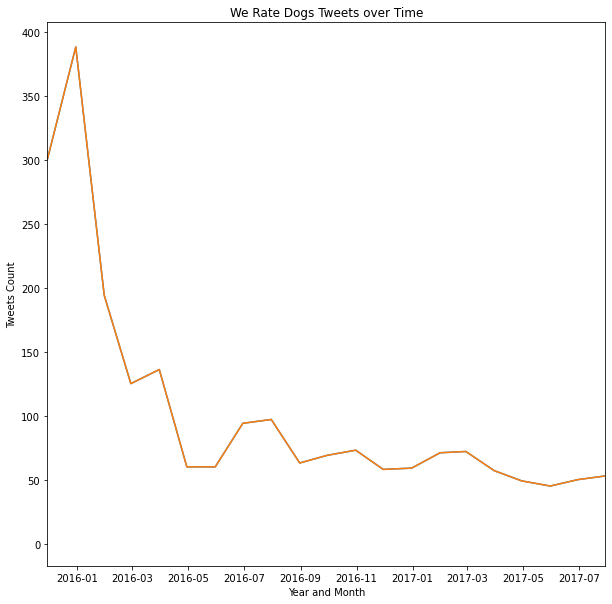

In [71]:
# tweets changing due to time

plt.figure(figsize=(10, 10));
plt.xlim([datetime.date(2015, 11, 30), datetime.date(2017, 7, 30)]);

plt.xlabel('Year and Month')
plt.ylabel('Tweets Count')

plt.plot(monthly_tweets.timestamp, monthly_tweets.tweet_id);
plt.title('We Rate Dogs Tweets over Time');

we can see that tweets are decreased Over time

In [72]:
# Use the most likely predicted breed in 'p1' that are dogs to aggregate tweet counts and their received favorites.
#Most tweeted dog breeds and their received favorites
dfs = pd.read_csv('twitter_archive_master.csv')
dfs = dfs.loc[(dfs.p1_dog == True) & (dfs.p1_conf > 0.8)]
dfs.drop(['p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1, inplace=True)
dfs.p1 = dfs.p1.str.replace('_', ' ').str.title()
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 477 entries, 20 to 2064
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tweet_id                       447 non-null    float64
 1   timestamp                      447 non-null    object 
 2   text                           447 non-null    object 
 3   rating_numerator               447 non-null    float64
 4   rating_denominator             447 non-null    float64
 5   name                           447 non-null    object 
 6   doggo                          447 non-null    object 
 7   floofer                        447 non-null    object 
 8   pupper                         447 non-null    object 
 9   puppo                          447 non-null    object 
 10  tweet_id.1                     477 non-null    float64
 11  jpg_url                        477 non-null    object 
 12  img_num                        477 non-null    f

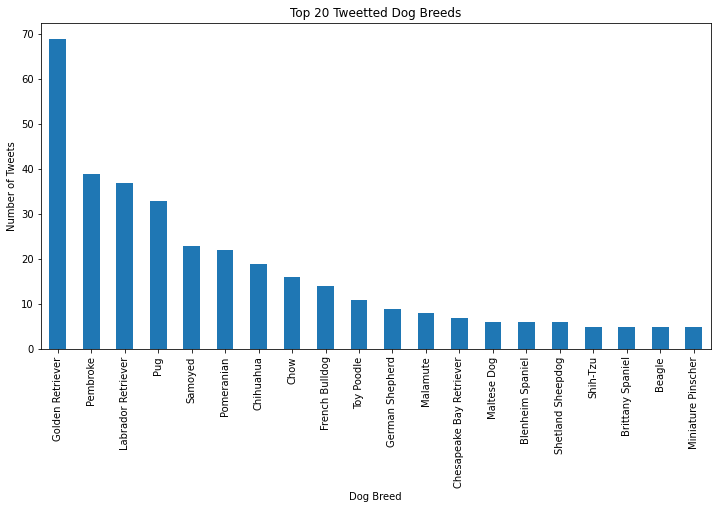

In [73]:
index = dfs.p1.value_counts().index

dfs.p1.value_counts()[index][:20].plot(kind='bar', figsize=(12, 6));

plt.title("Top 20 Tweetted Dog Breeds");
plt.xlabel("Dog Breed");
plt.ylabel("Number of Tweets");
plt.savefig('top_20_tweeted_breeds', bbox_inches='tight')

        Golden retriever is the most common dog in the dataset

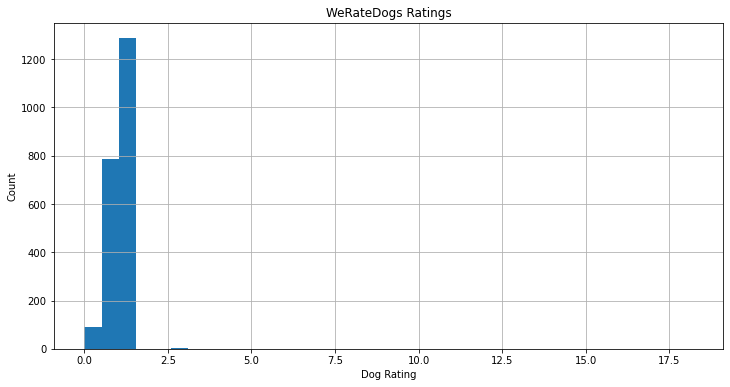

In [74]:
# calculate the ratings from 'rating_numerator'/'rating_denominator', drop a few outliers and plot its histgram.

dfs= pd.read_csv('twitter_archive_master.csv')
dfs['rating'] = dfs['rating_numerator']/dfs['rating_denominator']
# drop two large outliers
dfs = dfs[dfs.rating < 40]
dfs['rating'].hist(bins=35, figsize=(12, 6));
plt.title("WeRateDogs Ratings");
plt.xlabel("Dog Rating");
plt.ylabel("Count");
plt.savefig('ratings_dist', bbox_inches='tight')

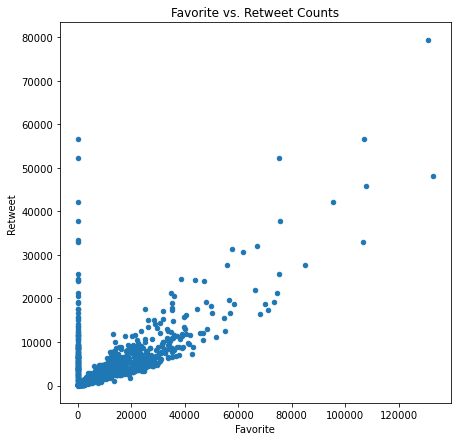

In [75]:
# scatterplot between 'favorite_count' and 'retweet_count' variables to examine their relationship.

dfs.plot(x='favorite_count', y='retweet_count', kind='scatter', figsize=(7, 7));
plt.title("Favorite vs. Retweet Counts");
plt.xlabel("Favorite");
plt.ylabel("Retweet");
plt.savefig('fav_retweet_scatter', bbox_inches='tight')



In [76]:
#the most common rating

dfs_integer_ratings= dfs[(dfs.rating_numerator <= 14) & (dfs.rating_numerator.apply(float.is_integer))]
subset_rating_count = dfs_integer_ratings.groupby(['rating_numerator']).count()['tweet_id']

            the most common one is 12
            the second is 10
            and the third most common one is 11

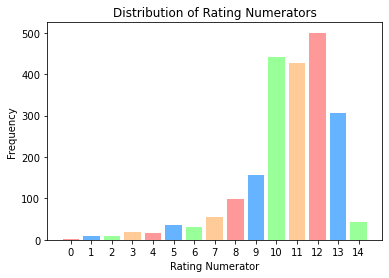

In [77]:
plt.bar(np.arange(15), subset_rating_count, color=('#ff9999','#66b3ff','#99ff99','#ffcc99'))
plt.xticks(np.arange(15))
plt.xlabel('Rating Numerator')
plt.ylabel('Frequency')
plt.title('Distribution of Rating Numerators');

plt.savefig('Most_common_rates.png', bbox_inches='tight')